# Project: FBI GUN DATA

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>    
</ul>

<a id='intro'></a>
## Introduction


This project is about the Analysis of data from  FBI's National Instant Criminal Background Check System. The data is used by gun shops to check if a person is elegible to buy a firearm or an explosive. I have investigated how difefrent variables affect a person's eligibility to buy a firearm or an explosive. I have also used the US census data to get an insite on how the population relates to the gun data.

Therefore, I have invesigated two data sets, the **gun_data.xlsx** data and the **U.S. Census Data.csv** data. 

The source of the two data sets comes from  <a href="https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md"> github</a>.




In [1]:
# We would like to display the graphics inline
%matplotlib inline

# First, we import the relevant libraries that we are going to use in our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# convert the xlx and cvs to pandas DataFrames
gun_data=pd.read_excel('gun_data.xlsx')
census_data=pd.read_csv('U.S. Census Data.csv')

### Analysis questions
To be able to come up with sound analysis questions, I will look at how data is structured and the types of variables provided. Therefore, I explore the the columns and relevant rows to get relevant questions. 

In [3]:
#scan through the the data
gun_data.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241
12484,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107


In [4]:
#scan through the the data
census_data.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [5]:
# check the variables and the contents of the data to come up with relevant question
print('columns:gun _data',gun_data.columns)
print('columns:census_Data',census_data.columns)

columns:gun _data Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')
columns:census_Data Index(['Fact', 'Fact Note', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampsh

In [6]:
# Dsiplay all values in Fact column to check if there is a relavant variable that may 
# affect the illigibility for one to have a gun
census_data['Fact'][:60]

0          Population estimates, July 1, 2016,  (V2016)
1     Population estimates base, April 1, 2010,  (V2...
2     Population, percent change - April 1, 2010 (es...
3                     Population, Census, April 1, 2010
4     Persons under 5 years, percent, July 1, 2016, ...
5         Persons under 5 years, percent, April 1, 2010
6     Persons under 18 years, percent, July 1, 2016,...
7        Persons under 18 years, percent, April 1, 2010
8     Persons 65 years and over, percent,  July 1, 2...
9     Persons 65 years and over, percent, April 1, 2010
10     Female persons, percent,  July 1, 2016,  (V2016)
11               Female persons, percent, April 1, 2010
12         White alone, percent, July 1, 2016,  (V2016)
13    Black or African American alone, percent, July...
14    American Indian and Alaska Native alone, perce...
15         Asian alone, percent, July 1, 2016,  (V2016)
16    Native Hawaiian and Other Pacific Islander alo...
17    Two or More Races, percent, July 1, 2016, 

In [7]:
# Dsiplay all values in Fact column to check if there is a relavant variable that may 
# affect the illigibility for one to have a gun
census_data['Fact'][60:]

60                            Veteran-owned firms, 2012
61                         Nonveteran-owned firms, 2012
62                     Population per square mile, 2010
63                      Land area in square miles, 2010
64                                            FIPS Code
65                                                  NaN
66    NOTE: FIPS Code values are enclosed in quotes ...
67                                                  NaN
68                                          Value Notes
69                                                    1
70                                                  NaN
71                                           Fact Notes
72                                                  (a)
73                                                  (b)
74                                                  (c)
75                                                  NaN
76                                          Value Flags
77                                              

In [8]:
# check if we have data for 2016
gun_data[gun_data['month']== '2016-01'].head(5)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
1100,2016-01,Alabama,27242.0,NaN,25445.0,14785.0,1266.0,884,0.0,8.0,...,0.0,NaN,NaN,16.0,15.0,2.0,0.0,1.0,0.0,73218
1101,2016-01,Alaska,192.0,NaN,2859.0,2245.0,300.0,164,0.0,5.0,...,0.0,NaN,NaN,2.0,0.0,0.0,0.0,1.0,0.0,6085
1102,2016-01,Arizona,3898.0,NaN,15745.0,8512.0,1107.0,575,0.0,7.0,...,0.0,NaN,NaN,10.0,9.0,2.0,4.0,2.0,0.0,31910
1103,2016-01,Arkansas,3670.0,NaN,7954.0,5982.0,305.0,340,0.0,11.0,...,0.0,NaN,NaN,3.0,6.0,1.0,1.0,0.0,0.0,20437
1104,2016-01,California,127715.0,NaN,52139.0,32970.0,7054.0,0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,220912


#### Questions
The data on census is based on 2016 data, therefore, I aligned the questions based on 2016 or earlier.

Based on the two data sets provided, I came up with the following questions;


* What is the general trend in gun purchases?
* Which country has the highest gun puchase to people ratio in 2016
* Which states have the lowest and the highest chances of being given a permit to own a gun in 2016? 
* How does the chances of being given a permit in 2016 relates to *poverty level*  *Per capita income*,  *the population estimates* and  *Total employment*

<a id='wrangling'></a>
## Data Wrangling

### General Properties

The data is already loaded, therefore, we procceed with inspecting it's basic details. 

In [9]:
# scan through the data to understand its scructure te properties of the columns and rows
gun_data.head(2)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303


In [10]:
census_data.head(2)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"


In [11]:
#check dimension of each data
print('gun_data.shape:',gun_data.shape)
print('census_data:',census_data.shape)

gun_data.shape: (12485, 27)
census_data: (85, 52)


In [12]:
##check objects of each column and number of non-null values
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [13]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

#### Structure of the census data:
The data has properties of the states along the rows. To make the data similar to the gun_data, I transposed it. Thereafter, I will make the two data sets have states are their key.  

In [14]:
#transpose census data to have States on a vertical column like the gun_data
census_data_v1=census_data.transpose()
census_data_v1.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#check the shape of transposed data
census_data_v1.shape

(52, 85)

In [16]:
#Verify the shape with the original data
census_data.shape

(85, 52)


### Data Cleaning : the gun data
#### Removal of the unwanted columns and rows
Every gun purchase corresponds to a certain permit. Therefore, by analysing the trend in issuance of the permit I will be analysing the trend in the gun purchase. Therefore, I pulled out the data on the permit and saved it for analysis. 


In [17]:
gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [18]:
#check multiple entries in state column
gun_data['state'].value_counts().head()

Alabama          227
Puerto Rico      227
Nevada           227
New Hampshire    227
New Jersey       227
Name: state, dtype: int64

In [19]:
gun_data['month'].unique()

array(['2017-09', '2017-08', '2017-07', '2017-06', '2017-05', '2017-04',
       '2017-03', '2017-02', '2017-01', '2016-12', '2016-11', '2016-10',
       '2016-09', '2016-08', '2016-07', '2016-06', '2016-05', '2016-04',
       '2016-03', '2016-02', '2016-01', '2015-12', '2015-11', '2015-10',
       '2015-09', '2015-08', '2015-07', '2015-06', '2015-05', '2015-04',
       '2015-03', '2015-02', '2015-01', '2014-12', '2014-11', '2014-10',
       '2014-09', '2014-08', '2014-07', '2014-06', '2014-05', '2014-04',
       '2014-03', '2014-02', '2014-01', '2013-12', '2013-11', '2013-10',
       '2013-09', '2013-08', '2013-07', '2013-06', '2013-05', '2013-04',
       '2013-03', '2013-02', '2013-01', '2012-12', '2012-11', '2012-10',
       '2012-09', '2012-08', '2012-07', '2012-06', '2012-05', '2012-04',
       '2012-03', '2012-02', '2012-01', '2011-12', '2011-11', '2011-10',
       '2011-09', '2011-08', '2011-07', '2011-06', '2011-05', '2011-04',
       '2011-03', '2011-02', '2011-01', '2010-12', 

Create a Dataframe having the number permits for each state after a given date then find the sum of the permits for each row. The sum will be used to find the trend of registration of permits.


In [20]:
#Create an enpty data frame and input the values
trend_data=pd.DataFrame()
for i in gun_data['state'].unique():
    trend_data[i]=list(gun_data[gun_data['state']==i]['permit'])
trend_data.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,16717.0,209.0,5069.0,2935.0,57839.0,4356.0,4343.0,275.0,1.0,10784.0,...,16887.0,31390.0,12094.0,0.0,1.0,585.0,11451.0,1668.0,12224.0,280.0
1,19733.0,247.0,6733.0,3313.0,59528.0,5219.0,5896.0,288.0,19.0,18362.0,...,14548.0,22971.0,15013.0,0.0,81.0,2220.0,12068.0,2028.0,12647.0,408.0
2,18042.0,222.0,5606.0,2564.0,52610.0,4392.0,6387.0,305.0,19.0,16978.0,...,19766.0,19006.0,11902.0,0.0,103.0,1139.0,10910.0,1798.0,10275.0,279.0
3,19508.0,242.0,6505.0,3033.0,60142.0,4920.0,8290.0,533.0,17.0,18831.0,...,16722.0,23877.0,14721.0,0.0,126.0,728.0,12964.0,1889.0,11645.0,350.0
4,18538.0,247.0,6628.0,4137.0,58722.0,5408.0,8101.0,863.0,10.0,19014.0,...,23584.0,24168.0,16351.0,0.0,55.0,1148.0,14176.0,2141.0,13117.0,435.0


In [21]:
# provide the corresponding date for each row and make it an index
trend_data['permit_month']=gun_data['month'].unique()
trend_data.set_index('permit_month', inplace=True)
trend_data.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
permit_month,,,,,,,,,,,,,,,,,,,,,
2017-09,16717.0,209.0,5069.0,2935.0,57839.0,4356.0,4343.0,275.0,1.0,10784.0,...,16887.0,31390.0,12094.0,0.0,1.0,585.0,11451.0,1668.0,12224.0,280.0
2017-08,19733.0,247.0,6733.0,3313.0,59528.0,5219.0,5896.0,288.0,19.0,18362.0,...,14548.0,22971.0,15013.0,0.0,81.0,2220.0,12068.0,2028.0,12647.0,408.0
2017-07,18042.0,222.0,5606.0,2564.0,52610.0,4392.0,6387.0,305.0,19.0,16978.0,...,19766.0,19006.0,11902.0,0.0,103.0,1139.0,10910.0,1798.0,10275.0,279.0
2017-06,19508.0,242.0,6505.0,3033.0,60142.0,4920.0,8290.0,533.0,17.0,18831.0,...,16722.0,23877.0,14721.0,0.0,126.0,728.0,12964.0,1889.0,11645.0,350.0
2017-05,18538.0,247.0,6628.0,4137.0,58722.0,5408.0,8101.0,863.0,10.0,19014.0,...,23584.0,24168.0,16351.0,0.0,55.0,1148.0,14176.0,2141.0,13117.0,435.0


In [22]:
#check data types
trend_data.dtypes

Alabama                 float64
Alaska                  float64
Arizona                 float64
Arkansas                float64
California              float64
Colorado                float64
Connecticut             float64
Delaware                float64
District of Columbia    float64
Florida                 float64
Georgia                 float64
Guam                    float64
Hawaii                  float64
Idaho                   float64
Illinois                float64
Indiana                 float64
Iowa                    float64
Kansas                  float64
Kentucky                float64
Louisiana               float64
Maine                   float64
Mariana Islands         float64
Maryland                float64
Massachusetts           float64
Michigan                float64
Minnesota               float64
Mississippi             float64
Missouri                float64
Montana                 float64
Nebraska                float64
Nevada                  float64
New Hamp

In [23]:
#check and remove deplicates
trend_data.duplicated().sum()

0

In [24]:
#check null values and remove them
trend_data.isnull().any().sum()

4

In [25]:
trend_data.dropna(inplace=True)

In [26]:
#verify there are no null values
trend_data.isnull().any().sum()

0

In [27]:
trend_data.shape

(204, 55)

The data on trend is ready for analysis. I will use it to find the trend and also to compute the total number of permits in the year 2016. Therefore save it as csv under the name **trend_data_v1.csv**.

In [28]:
trend_data.to_csv('trend_data_v1.csv', index=True)

### Data Cleaning : the census data
#### Removal of the unwanted columns and rows
I clean the data to have the wanted variables only.

In [29]:
census_data.head(1)


,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"


First, I drop the **Fact Note** column because I do not need it in the analysis.

In [30]:
census_data.drop(columns={'Fact Note'}, inplace=True)

In [31]:
census_data.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


Next, I filter out the rows having the variables that we want for analysis. The rows are gives data on **poverty level**,  **Per capita income**,  **the population estimates** and  **Total employment**.

In [32]:
census_data.Fact[:60]

0          Population estimates, July 1, 2016,  (V2016)
1     Population estimates base, April 1, 2010,  (V2...
2     Population, percent change - April 1, 2010 (es...
3                     Population, Census, April 1, 2010
4     Persons under 5 years, percent, July 1, 2016, ...
5         Persons under 5 years, percent, April 1, 2010
6     Persons under 18 years, percent, July 1, 2016,...
7        Persons under 18 years, percent, April 1, 2010
8     Persons 65 years and over, percent,  July 1, 2...
9     Persons 65 years and over, percent, April 1, 2010
10     Female persons, percent,  July 1, 2016,  (V2016)
11               Female persons, percent, April 1, 2010
12         White alone, percent, July 1, 2016,  (V2016)
13    Black or African American alone, percent, July...
14    American Indian and Alaska Native alone, perce...
15         Asian alone, percent, July 1, 2016,  (V2016)
16    Native Hawaiian and Other Pacific Islander alo...
17    Two or More Races, percent, July 1, 2016, 

In [33]:
census_data.Fact[60:]

60                            Veteran-owned firms, 2012
61                         Nonveteran-owned firms, 2012
62                     Population per square mile, 2010
63                      Land area in square miles, 2010
64                                            FIPS Code
65                                                  NaN
66    NOTE: FIPS Code values are enclosed in quotes ...
67                                                  NaN
68                                          Value Notes
69                                                    1
70                                                  NaN
71                                           Fact Notes
72                                                  (a)
73                                                  (b)
74                                                  (c)
75                                                  NaN
76                                          Value Flags
77                                              

In [34]:
#confirm the row names of the index to pull out
census_data.iloc[0,0]

'Population estimates, July 1, 2016,  (V2016)'

In [35]:
census_data.iloc[48,0]

'Per capita income in past 12 months (in 2015 dollars), 2011-2015'

In [36]:
census_data.iloc[49,0]

'Persons in poverty, percent'

In [37]:
census_data.iloc[51,0]

'Total employment, 2015'

In [38]:
#filter out relavent data of a transposed DataFrame
transp=census_data.transpose()
filtered_data=transp.iloc[:,np.r_[0,48,49,51]]
filtered_data.head()

,0,48,49,51
Fact,"Population estimates, July 1, 2016, (V2016)",Per capita income in past 12 months (in 2015 d...,"Persons in poverty, percent","Total employment, 2015"
Alabama,"4,863,300","$24,091",17.10%,"1,634,391"
Alaska,"741,894","$33,413",9.90%,"267,999"
Arizona,"6,931,071","$25,848",16.40%,"2,295,186"
Arkansas,"2,988,248","$22,798",17.20%,"1,003,113"


In [39]:
filtered_data.iloc[0,:]

0          Population estimates, July 1, 2016,  (V2016)
48    Per capita income in past 12 months (in 2015 d...
49                          Persons in poverty, percent
51                               Total employment, 2015
Name: Fact, dtype: object

In [40]:
#drop the row having the features of the table
filtered_data.drop('Fact', inplace=True)


C:\Users\Fidelis\Anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
filtered_data.head()

,0,48,49,51
Alabama,"4,863,300","$24,091",17.10%,"1,634,391"
Alaska,"741,894","$33,413",9.90%,"267,999"
Arizona,"6,931,071","$25,848",16.40%,"2,295,186"
Arkansas,"2,988,248","$22,798",17.20%,"1,003,113"
California,"39,250,017","$30,318",14.30%,"14,325,377"


In [42]:
#Rename the columns
new_names=['population','per_capita_income','poverty_level(%)','Total employment']
filtered_data.columns=new_names
filtered_data.head()


,population,per_capita_income,poverty_level(%),Total employment
Alabama,"4,863,300","$24,091",17.10%,"1,634,391"
Alaska,"741,894","$33,413",9.90%,"267,999"
Arizona,"6,931,071","$25,848",16.40%,"2,295,186"
Arkansas,"2,988,248","$22,798",17.20%,"1,003,113"
California,"39,250,017","$30,318",14.30%,"14,325,377"


In [43]:
filtered_data.shape

(50, 4)

In [44]:
#check data types and null values
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   population         50 non-null     object
 1   per_capita_income  50 non-null     object
 2   poverty_level(%)   50 non-null     object
 3   Total employment   50 non-null     object
dtypes: object(4)
memory usage: 2.0+ KB


In [45]:
#remove commas in numeric extries
filtered_data=filtered_data.apply(lambda x: x.str.replace(',', ''))
filtered_data.head()

,population,per_capita_income,poverty_level(%),Total employment
Alabama,4863300,$24091,17.10%,1634391
Alaska,741894,$33413,9.90%,267999
Arizona,6931071,$25848,16.40%,2295186
Arkansas,2988248,$22798,17.20%,1003113
California,39250017,$30318,14.30%,14325377


In [46]:
#remove commas in percetages
filtered_data=filtered_data.apply(lambda x: x.str.replace('%', ''))
filtered_data.head()

,population,per_capita_income,poverty_level(%),Total employment
Alabama,4863300,$24091,17.10,1634391
Alaska,741894,$33413,9.90,267999
Arizona,6931071,$25848,16.40,2295186
Arkansas,2988248,$22798,17.20,1003113
California,39250017,$30318,14.30,14325377


In [47]:
#remove commas in dollar sign
filtered_data=filtered_data.apply(lambda x: x.str.replace('$', ''))
filtered_data.head()

C:\Users\Fidelis\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,population,per_capita_income,poverty_level(%),Total employment
Alabama,4863300,24091,17.10,1634391
Alaska,741894,33413,9.90,267999
Arizona,6931071,25848,16.40,2295186
Arkansas,2988248,22798,17.20,1003113
California,39250017,30318,14.30,14325377


In [48]:
#Concert columns to  float
filtered_data=filtered_data.astype(float)
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   population         50 non-null     float64
 1   per_capita_income  50 non-null     float64
 2   poverty_level(%)   50 non-null     float64
 3   Total employment   50 non-null     float64
dtypes: float64(4)
memory usage: 2.0+ KB


In [49]:
#check null values
filtered_data.isnull().any().sum()

0

In [50]:
#check dubplicated data
filtered_data.duplicated().sum()

0

#### Combine the two data sets
Next, I combined the a row from the sensus data with the gun_data for the year 2016 so that I can carry out the analysis. I pulled out the total population for the census data and combined it with the gun_data to prepare the data to answer other questions. 

In [51]:
filtered_data.shape

(50, 4)

In [52]:
trend_data_v1=pd.read_csv('trend_data_v1.csv')
trend_data_v1.tail()

,permit_month,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
199,1999-11,0.0,0.0,1534.0,254.0,10394.0,0.0,2201.0,0.0,0.0,...,0.0,4398.0,0.0,0.0,0.0,0.0,1139.0,0.0,0.0,184.0
200,1999-10,0.0,0.0,1506.0,479.0,7976.0,0.0,2541.0,0.0,0.0,...,0.0,4654.0,0.0,0.0,0.0,0.0,1119.0,0.0,0.0,270.0
201,1999-09,0.0,0.0,1640.0,868.0,8101.0,0.0,2734.0,0.0,0.0,...,0.0,4662.0,0.0,0.0,0.0,0.0,876.0,0.0,0.0,215.0
202,1999-08,0.0,0.0,1576.0,505.0,8723.0,0.0,3295.0,0.0,0.0,...,0.0,4723.0,0.0,0.0,0.0,0.0,1133.0,0.0,0.0,175.0
203,1998-11,0.0,4.0,0.0,0.0,434.0,0.0,17.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,8.0


Trend data has 56 column while the filtered_data has 50 rows. I have to drop 6 columns for the data that I will be appending to the filtered data.  

In [53]:
#pull oout the total regidtered permit from the trend_data_v1 in 2016 
permit_2016=trend_data_v1[trend_data_v1['permit_month'].str.startswith('2016', na=False)]
permit_2016.set_index('permit_month', inplace=True)
permit_2016.shape

(12, 55)

In [54]:
permit_2016.tail()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
permit_month,,,,,,,,,,,,,,,,,,,,,
2016-05,20092.0,253.0,6941.0,5452.0,91841.0,6924.0,15718.0,1255.0,57.0,27235.0,...,2564.0,25496.0,16748.0,0.0,84.0,943.0,12459.0,1939.0,6549.0,868.0
2016-04,20959.0,298.0,7230.0,5825.0,93023.0,8900.0,16609.0,848.0,11.0,27570.0,...,4151.0,38061.0,22419.0,0.0,59.0,415.0,34121.0,2323.0,8256.0,785.0
2016-03,27829.0,256.0,8078.0,7649.0,117206.0,11129.0,16727.0,690.0,5.0,34627.0,...,2578.0,48497.0,21789.0,0.0,67.0,828.0,89199.0,3003.0,10344.0,700.0
2016-02,24746.0,284.0,4627.0,4167.0,134211.0,9004.0,14261.0,415.0,14.0,33181.0,...,12348.0,56900.0,12927.0,0.0,86.0,784.0,15736.0,3527.0,9420.0,551.0
2016-01,27242.0,192.0,3898.0,3670.0,127715.0,8431.0,14005.0,395.0,27.0,28458.0,...,14485.0,36269.0,10485.0,0.0,73.0,524.0,19688.0,3378.0,9496.0,959.0


In [55]:
#create a row for sum of the 
permit_2016.loc['sum']=permit_2016.sum(axis=0)

C:\Users\Fidelis\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [56]:
permit_2016.tail()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
permit_month,,,,,,,,,,,,,,,,,,,,,
2016-04,20959.0,298.0,7230.0,5825.0,93023.0,8900.0,16609.0,848.0,11.0,27570.0,...,4151.0,38061.0,22419.0,0.0,59.0,415.0,34121.0,2323.0,8256.0,785.0
2016-03,27829.0,256.0,8078.0,7649.0,117206.0,11129.0,16727.0,690.0,5.0,34627.0,...,2578.0,48497.0,21789.0,0.0,67.0,828.0,89199.0,3003.0,10344.0,700.0
2016-02,24746.0,284.0,4627.0,4167.0,134211.0,9004.0,14261.0,415.0,14.0,33181.0,...,12348.0,56900.0,12927.0,0.0,86.0,784.0,15736.0,3527.0,9420.0,551.0
2016-01,27242.0,192.0,3898.0,3670.0,127715.0,8431.0,14005.0,395.0,27.0,28458.0,...,14485.0,36269.0,10485.0,0.0,73.0,524.0,19688.0,3378.0,9496.0,959.0
sum,291039.0,3121.0,87771.0,55456.0,1036981.0,85087.0,148949.0,8440.0,144.0,337086.0,...,106082.0,390462.0,178393.0,0.0,759.0,9817.0,268274.0,26806.0,199431.0,7938.0


In [57]:
#Identify the state that are not in both data sets then drop them
for state in permit_2016.columns:
    if state not in filtered_data.index.values:
        print(state)

District of Columbia
Guam
Mariana Islands
Puerto Rico
Virgin Islands


I delete 'District of Columbia','Guam','Mariana Islands','Puerto Rico','Virgin Islands' from the sum of the columns from the permit_2016 data 

In [58]:
permit_2016_v1=permit_2016.copy()

In [59]:
#drop all rows to remain with the last row(the sum row)
permit_2016_v1.drop(permit_2016_v1.iloc[0:len(permit_2016_v1.index.values)-1,:].index, inplace=True)

In [60]:
permit_2016_v1.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
permit_month,,,,,,,,,,,,,,,,,,,,,
sum,291039.0,3121.0,87771.0,55456.0,1036981.0,85087.0,148949.0,8440.0,144.0,337086.0,...,106082.0,390462.0,178393.0,0.0,759.0,9817.0,268274.0,26806.0,199431.0,7938.0


In [61]:
#drop rows columns that are not in all tables
permit_2016_v1.drop(columns={'District of Columbia','Guam','Mariana Islands','Puerto Rico','Virgin Islands'}, inplace=True)

In [62]:
permit_2016_v1.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
permit_month,,,,,,,,,,,,,,,,,,,,,
sum,291039.0,3121.0,87771.0,55456.0,1036981.0,85087.0,148949.0,8440.0,337086.0,233115.0,...,16279.0,106082.0,390462.0,178393.0,0.0,9817.0,268274.0,26806.0,199431.0,7938.0


In [63]:
## we check if the cities match
permit_2016_v1.columns==filtered_data.index.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [64]:
#preview Filtered_data
filtered_data.head()

,population,per_capita_income,poverty_level(%),Total employment
Alabama,4863300.0,24091.0,17.1,1634391.0
Alaska,741894.0,33413.0,9.9,267999.0
Arizona,6931071.0,25848.0,16.4,2295186.0
Arkansas,2988248.0,22798.0,17.2,1003113.0
California,39250017.0,30318.0,14.3,14325377.0


In [65]:
# create column of total  
filtered_data['total_permit']=permit_2016_v1.loc['sum']
filtered_data.head()

,population,per_capita_income,poverty_level(%),Total employment,total_permit
Alabama,4863300.0,24091.0,17.1,1634391.0,291039.0
Alaska,741894.0,33413.0,9.9,267999.0,3121.0
Arizona,6931071.0,25848.0,16.4,2295186.0,87771.0
Arkansas,2988248.0,22798.0,17.2,1003113.0,55456.0
California,39250017.0,30318.0,14.3,14325377.0,1036981.0


In [66]:
#compute a chance of getting a permit and create column
filtered_data['chance_get_permit']=filtered_data['total_permit']/filtered_data['population']
filtered_data.head()

,population,per_capita_income,poverty_level(%),Total employment,total_permit,chance_get_permit
Alabama,4863300.0,24091.0,17.1,1634391.0,291039.0,0.059844
Alaska,741894.0,33413.0,9.9,267999.0,3121.0,0.004207
Arizona,6931071.0,25848.0,16.4,2295186.0,87771.0,0.012663
Arkansas,2988248.0,22798.0,17.2,1003113.0,55456.0,0.018558
California,39250017.0,30318.0,14.3,14325377.0,1036981.0,0.026420



The table is read for analysis. I now save it as **chance_permit_data_v1.csv**

In [67]:
filtered_data.to_csv('chance_permit_data_v1.csv')

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What is the general trend in gun purchases?

In [68]:
trend_data_v1=pd.read_csv('trend_data_v1.csv')
trend_data_v1.set_index('permit_month', inplace=True)


In [69]:
trend_data_v1.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
permit_month,,,,,,,,,,,,,,,,,,,,,
2017-09,16717.0,209.0,5069.0,2935.0,57839.0,4356.0,4343.0,275.0,1.0,10784.0,...,16887.0,31390.0,12094.0,0.0,1.0,585.0,11451.0,1668.0,12224.0,280.0
2017-08,19733.0,247.0,6733.0,3313.0,59528.0,5219.0,5896.0,288.0,19.0,18362.0,...,14548.0,22971.0,15013.0,0.0,81.0,2220.0,12068.0,2028.0,12647.0,408.0
2017-07,18042.0,222.0,5606.0,2564.0,52610.0,4392.0,6387.0,305.0,19.0,16978.0,...,19766.0,19006.0,11902.0,0.0,103.0,1139.0,10910.0,1798.0,10275.0,279.0
2017-06,19508.0,242.0,6505.0,3033.0,60142.0,4920.0,8290.0,533.0,17.0,18831.0,...,16722.0,23877.0,14721.0,0.0,126.0,728.0,12964.0,1889.0,11645.0,350.0
2017-05,18538.0,247.0,6628.0,4137.0,58722.0,5408.0,8101.0,863.0,10.0,19014.0,...,23584.0,24168.0,16351.0,0.0,55.0,1148.0,14176.0,2141.0,13117.0,435.0


In [70]:
#create a column for total permits by dates
trend_data_v1['total_permits']=trend_data_v1.sum(axis=1)

In [71]:
trend_data_v1.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming,total_permits
permit_month,,,,,,,,,,,,,,,,,,,,,
2017-09,16717.0,209.0,5069.0,2935.0,57839.0,4356.0,4343.0,275.0,1.0,10784.0,...,31390.0,12094.0,0.0,1.0,585.0,11451.0,1668.0,12224.0,280.0,761622.0
2017-08,19733.0,247.0,6733.0,3313.0,59528.0,5219.0,5896.0,288.0,19.0,18362.0,...,22971.0,15013.0,0.0,81.0,2220.0,12068.0,2028.0,12647.0,408.0,789993.0
2017-07,18042.0,222.0,5606.0,2564.0,52610.0,4392.0,6387.0,305.0,19.0,16978.0,...,19006.0,11902.0,0.0,103.0,1139.0,10910.0,1798.0,10275.0,279.0,754920.0
2017-06,19508.0,242.0,6505.0,3033.0,60142.0,4920.0,8290.0,533.0,17.0,18831.0,...,23877.0,14721.0,0.0,126.0,728.0,12964.0,1889.0,11645.0,350.0,800655.0
2017-05,18538.0,247.0,6628.0,4137.0,58722.0,5408.0,8101.0,863.0,10.0,19014.0,...,24168.0,16351.0,0.0,55.0,1148.0,14176.0,2141.0,13117.0,435.0,830963.0


In [72]:
trend_data_v1.shape

(204, 56)

I come up with a line plot shang the trend. Since there are 204 data values I systematically pick 6 values to help in creating a line plot. Since 204/5=40.8, I choosed the index 0, 40, 81, 121, 163, 204. The systematically sample data is shown below.

In [73]:
trend_data_v1_sampled=trend_data_v1.iloc[[0,40,81,121,163,203],:]
trend_data_v1_sampled

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming,total_permits
permit_month,,,,,,,,,,,,,,,,,,,,,
2017-09,16717.0,209.0,5069.0,2935.0,57839.0,4356.0,4343.0,275.0,1.0,10784.0,...,31390.0,12094.0,0.0,1.0,585.0,11451.0,1668.0,12224.0,280.0,761622.0
2014-05,16215.0,274.0,6529.0,6299.0,50964.0,5543.0,7632.0,301.0,0.0,18764.0,...,17072.0,20462.0,0.0,82.0,0.0,12897.0,911.0,4159.0,931.0,598663.0
2010-12,413.0,0.0,2082.0,2582.0,24901.0,1381.0,6791.0,0.0,0.0,30.0,...,10633.0,25888.0,0.0,111.0,0.0,6632.0,31.0,0.0,330.0,378894.0
2007-08,0.0,0.0,2604.0,1268.0,30631.0,0.0,4490.0,0.0,0.0,0.0,...,10598.0,3850.0,0.0,43.0,0.0,5804.0,0.0,0.0,300.0,268519.0
2002-11,0.0,0.0,2303.0,431.0,10970.0,0.0,2760.0,0.0,0.0,0.0,...,10686.0,0.0,0.0,0.0,0.0,4181.0,0.0,0.0,106.0,110405.0
1998-11,0.0,4.0,0.0,0.0,434.0,0.0,17.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,8.0,2073.0


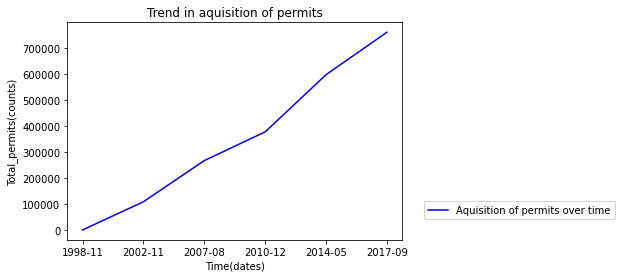

In [74]:
#plot showing trend in 
plt.plot(trend_data_v1_sampled['total_permits'].sort_values(), color='blue')
plt.title('Trend in aquisition of permits')
plt.ylabel('Total_permits(counts)')
plt.xlabel('Time(dates)');
plt.legend(['Aquisition of permits over time'],bbox_to_anchor=(1.65,0.2));


The line plot is much steeper at the end than in the beginning. Furthermore, from left to right, the line plot has a positive slope. This implies that the there is an increase in the aquisition of permits with time. Consequently, there is an increase in the purchase of guns and exponsives. The increase is relatively much higher towards 2017 and very low in 1990's.


### Research Question 2: Which country has the highest gun puchase to people ratio in 2016?


In [75]:
filtered_data.sort_values(by='chance_get_permit', ascending=False).head(10)

,population,per_capita_income,poverty_level(%),Total employment,total_permit,chance_get_permit
Kentucky,4436974.0,24063.0,18.5,1579477.0,3372613.0,0.760116
Indiana,6633053.0,25346.0,14.1,2660503.0,946912.0,0.142757
Illinois,12801539.0,30494.0,13.0,5427549.0,962930.0,0.075220
Minnesota,5519952.0,32157.0,9.9,2612314.0,350315.0,0.063463
Alabama,4863300.0,24091.0,17.1,1634391.0,291039.0,0.059844
Utah,3051217.0,24686.0,10.2,1203954.0,178393.0,0.058466
Iowa,3134693.0,27950.0,11.8,1338418.0,161841.0,0.051629
Connecticut,3576452.0,38803.0,9.8,1503102.0,148949.0,0.041647
Washington,7288000.0,31762.0,11.3,2602408.0,268274.0,0.036810
New Hampshire,1334795.0,34362.0,7.3,576424.0,48347.0,0.036221


In [76]:
filtered_data.sort_values(by='chance_get_permit', ascending=False).tail(5)

,population,per_capita_income,poverty_level(%),Total employment,total_permit,chance_get_permit
Oregon,4093465.0,27684.0,0.133,1498727.0,2903.0,0.000709
New Jersey,8944469.0,36582.0,10.400,3558619.0,0.0,0.000000
Rhode Island,1056426.0,31118.0,0.128,425748.0,0.0,0.000000
Vermont,624594.0,29894.0,11.900,266363.0,0.0,0.000000
Oklahoma,3923561.0,25032.0,0.163,1370988.0,0.0,0.000000


**Kentucky** has the highest number of registered permits as well as the highest permits to people ratio. From the results, in 100 people, 76 are registered to hold a gun an explosive. The second country is **Indiana** with 14.2\% of people registered to have the gun. The other are less than 10%. In **New Jersey, Rhode Island, Vermont** and **Oklahoma**, the percentage of the people registered for the gun is zero according to the data. This implies that the percentage very small, almost not recognizable.

### Research Question 3: Which states have the lowest and the highest chances of being given a permit to own a gun in 2016?

In [77]:
# sort the data by chance_get_permit in desceding order
filtered_data.sort_values(by='chance_get_permit', ascending=False).head()

,population,per_capita_income,poverty_level(%),Total employment,total_permit,chance_get_permit
Kentucky,4436974.0,24063.0,18.5,1579477.0,3372613.0,0.760116
Indiana,6633053.0,25346.0,14.1,2660503.0,946912.0,0.142757
Illinois,12801539.0,30494.0,13.0,5427549.0,962930.0,0.075220
Minnesota,5519952.0,32157.0,9.9,2612314.0,350315.0,0.063463
Alabama,4863300.0,24091.0,17.1,1634391.0,291039.0,0.059844


In [78]:
filtered_data.sort_values(by='chance_get_permit', ascending=False).tail()

,population,per_capita_income,poverty_level(%),Total employment,total_permit,chance_get_permit
Oregon,4093465.0,27684.0,0.133,1498727.0,2903.0,0.000709
New Jersey,8944469.0,36582.0,10.400,3558619.0,0.0,0.000000
Rhode Island,1056426.0,31118.0,0.128,425748.0,0.0,0.000000
Vermont,624594.0,29894.0,11.900,266363.0,0.0,0.000000
Oklahoma,3923561.0,25032.0,0.163,1370988.0,0.0,0.000000


There are high chances of getting a permit to purchase a gun or an explosive in **Kenturky** followed by Indian states than in any others states. The chances of owning the explosive or a gun is 76\%, much than any other states. Indian followed at a distance by a chance of about 14%. For there other states, there is less than 88% chance of getting a permit. On the other hand, there is almost no chance of getting a permmit to purchase a gun or an explosive in  **New Jersey, Rhode Island, Vermont** and **Oklahoma**.

### Research Question 4: How does the chances of being given a permit in 2016 relates to *poverty level*  *Per capita income*,  *the population estimates* and  *Total employment*

We draw a scatter plot for the chances of getting a permit against the *poverty level*  *Per capita income*,  *the population estimates* and  *Total employment*.
We create a function to avoid repetitive codes.

In [79]:
#Repetitive function for creating combined plot
def scatterplot_1(indep_var,dep_var,colorr,markerr,sample,x, title):
    return plt.scatter(x=indep_var,y=dep_var, color=colorr, marker=markerr,s=sample),plt.xlabel(x), plt.ylabel('Chance of getting a permit \n (permit per person)'),plt.title(title) 

In [80]:
inde_var=np.array([filtered_data['per_capita_income'],filtered_data['poverty_level(%)'],
                   filtered_data['population'],filtered_data['Total employment']])
dep_var=filtered_data['chance_get_permit']
colors=['red','blue','black','green']

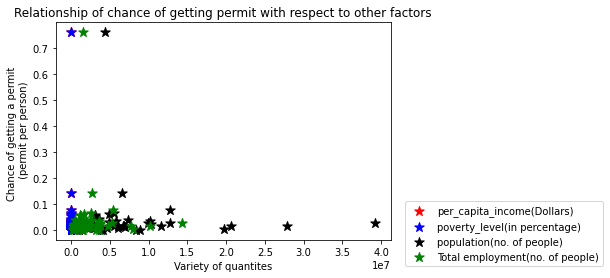

In [81]:
#plot chance of getting permit with respect to other factors
title_of_plot='Relationship of chance of getting permit with respect to other factors'
for var,a_color in zip(inde_var,colors):
    scatterplot_1(var,dep_var,a_color,'*',100,'Variety of quantites',title_of_plot)
plt.legend(['per_capita_income(Dollars)','poverty_level(in percentage)','population(no. of people)','Total employment(no. of people)'], bbox_to_anchor=(1.65,0.2));

The four variables together having a very low correlation coefficient. We now check the correlation variable by variable. We also drop the outlier to see the changes in the variables.

In [82]:
filtered_data.head()

,population,per_capita_income,poverty_level(%),Total employment,total_permit,chance_get_permit
Alabama,4863300.0,24091.0,17.1,1634391.0,291039.0,0.059844
Alaska,741894.0,33413.0,9.9,267999.0,3121.0,0.004207
Arizona,6931071.0,25848.0,16.4,2295186.0,87771.0,0.012663
Arkansas,2988248.0,22798.0,17.2,1003113.0,55456.0,0.018558
California,39250017.0,30318.0,14.3,14325377.0,1036981.0,0.026420


In [83]:
filtered_data.loc['Kentucky']

population           4.436974e+06
per_capita_income    2.406300e+04
poverty_level(%)     1.850000e+01
Total employment     1.579477e+06
total_permit         3.372613e+06
chance_get_permit    7.601156e-01
Name: Kentucky, dtype: float64

In [84]:
#Delete the rows having outlier values
filtered_data.drop(['Kentucky','Indiana'],axis=0, inplace=True)
filtered_data.head()

,population,per_capita_income,poverty_level(%),Total employment,total_permit,chance_get_permit
Alabama,4863300.0,24091.0,17.1,1634391.0,291039.0,0.059844
Alaska,741894.0,33413.0,9.9,267999.0,3121.0,0.004207
Arizona,6931071.0,25848.0,16.4,2295186.0,87771.0,0.012663
Arkansas,2988248.0,22798.0,17.2,1003113.0,55456.0,0.018558
California,39250017.0,30318.0,14.3,14325377.0,1036981.0,0.026420


In [85]:
#verify the deleted the rows
filtered_data.sort_values(by='chance_get_permit', ascending=False).head(4)

,population,per_capita_income,poverty_level(%),Total employment,total_permit,chance_get_permit
Illinois,12801539.0,30494.0,13.0,5427549.0,962930.0,0.075220
Minnesota,5519952.0,32157.0,9.9,2612314.0,350315.0,0.063463
Alabama,4863300.0,24091.0,17.1,1634391.0,291039.0,0.059844
Utah,3051217.0,24686.0,10.2,1203954.0,178393.0,0.058466


In [86]:
inde_var1=np.array([filtered_data['per_capita_income'],filtered_data['poverty_level(%)'],
                   filtered_data['population'],filtered_data['Total employment']])
dep_var1=filtered_data['chance_get_permit']
colors=['red','blue','black','green']

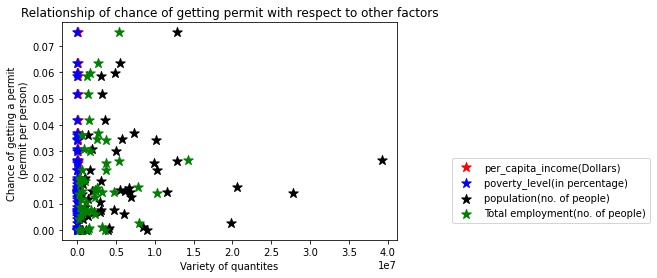

In [93]:
#plot chance of getting permit with respect to other factors
title_of_plot='Relationship of chance of getting permit with respect to other factors'
for var,a_color in zip(inde_var1,colors):
    scatterplot_1(var,dep_var1,a_color,'*',100,'Variety of quantites',title_of_plot)
plt.legend(['per_capita_income(Dollars)','poverty_level(in percentage)','population(no. of people)','Total employment(no. of people)'], bbox_to_anchor=(1.15,0.4));

The four variables together having a low correlation coefficient. We now check the correlation variable by variable.

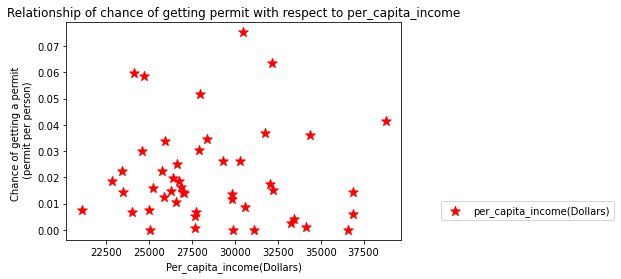

In [88]:
title_of_plot='Relationship of chance of getting permit with respect to per_capita_income'
dep_var=filtered_data['chance_get_permit']
scatterplot_1(filtered_data['per_capita_income'],dep_var,'red','*',100,'Per_capita_income(Dollars)',title_of_plot);
plt.legend(['per_capita_income(Dollars)'],bbox_to_anchor=(1.65,0.2))

The *chance of getting permit* variable have very weak positive correlation the *per_capita_income* variable. This implies that as the *per_capita_income* of the population of US increases, the chance of getting a permit to purchase a gun or an explosive increases but at a very slow rate. 

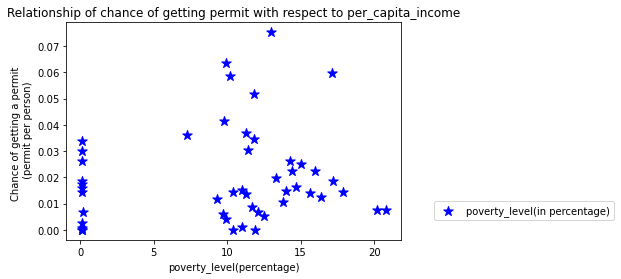

In [89]:
title_of_plot='Relationship of chance of getting permit with respect to per_capita_income'
scatterplot_1(filtered_data['poverty_level(%)'],dep_var,'blue','*',100,'poverty_level(percentage)',title_of_plot);
plt.legend(['poverty_level(in percentage)'],bbox_to_anchor=(1.65,0.2));

The *chance of getting permit* variable have weak positive correlation the *poverty_level* variable. This implies that as the *poverty_level* of the population of US increases, the chance of getting a permit to purchase a gun or an explosive increases but at a slow rate. 

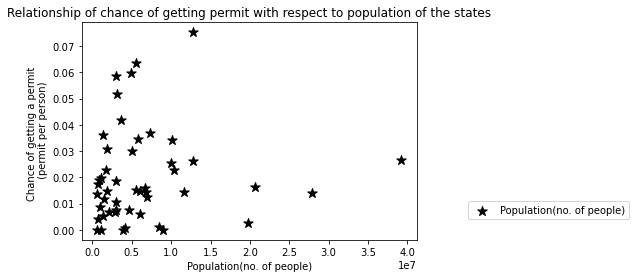

In [90]:
title_of_plot='Relationship of chance of getting permit with respect to population of the states'
scatterplot_1(filtered_data['population'],dep_var,'black','*',100,'Population(no. of people)',title_of_plot);
plt.legend(['Population(no. of people)'],bbox_to_anchor=(1.65,0.2));

The *chance of getting permit* variable have weak positive correlation the *population* variable. The data points are not alligned close to a straight line. This implies that as the *population* of US increases, the chance of getting a permit to purchase a gun or an explosive increases but at a slow rate. 

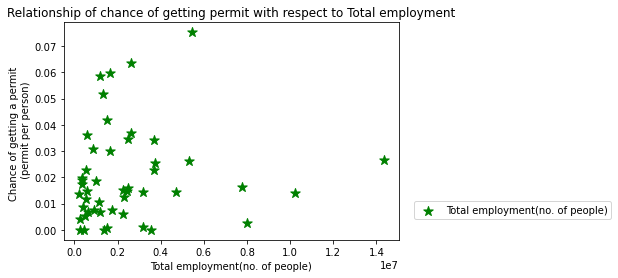

In [91]:
title_of_plot='Relationship of chance of getting permit with respect to Total employment'
scatterplot_1(filtered_data['Total employment'],dep_var,'green','*',100,'Total employment(no. of people)',title_of_plot);
plt.legend(['Total employment(no. of people)'],bbox_to_anchor=(1.65,0.2));

The *chance of getting permit* variable have weak positive correlation the *total employment* variable. The data points are not alligned close to a straight line. This implies that as the *total employment* of US increases, the chance of getting a permit to purchase a gun or an explosive increases but at a slow rate. 

By ignoring the oulier, we find that all the four variable have a positive correlation with the chance of getting a permit. 
Using variable by variable analysis, we find that **Per_capita_income** has a very weak positive correlation with the **chance of getting a permit**, **poverty_level(%)** has a weak positive correlation with the **chance of getting a permit**, **population** has a weaker positive correlation with the **chance of getting a permit** and **Total employment** has a  weaker positive correlation with the **chance of getting a permit**.
Therefore, the four variables can weakly determine the chance of one being allowed to buy gun or an explosive.


<a id='conclusions'></a>
## Conclusions

In conclusion, we have found that there is a very steep trend in the increase of purchase of guns and explosives with respect to time.The limitation of the project is that, we cannot attribute this to any variable that we analysed.Another result is that Kenturky has the highest of about 76% of buying a gun or an explosive. The second state is Indiana whose chance is 14% way much below than Kenturky. In the other states, there is less than 8% chance of one being allowed to buy or purchase the gun or explosive. On the other hand, **New Jersey, Rhode Island, Vermont** and **Oklahoma** have zero chance of one buying a gun or an explosive. This implies the four states have very low, almost no chance of buying a gun or explosive. 

I also found that, **poverty level, Per capita income,  the population estimates** and  **Total employment** have a weak positive correlation with the **chance of one getting a permit**. These variable can weakly approximate the chance of one buying a gun or an explosive. A limitation of this finding is that the conclusion is based on correlation only. In fact, on visual correlation rather than numeric which may not be perfect one.



<a id='limitations'></a>
## Limitations

One of the limitation of the project was that the *census data* provided was not sufficient to enable me analyse for the correlations between the the **chance of getting a permit** and with **poverty level, Per capita income,  the population estimates** and  **Total employment** from 1988 to 2017. This is because the *gun data* had data from 1988 to 2017 while the *census data* had data for 2016 and 2010 which were not sufficient. On the hand other information such as total employment and poverty level was based on 2015 and not 2016, a year we used to represent the population of the states. Therefore, the results does not give a bigger picture of all these 30 years but merely one year.
Another limitation is that the correlation analysis is based on visualization only rather than visualization and modeling to find a regression function. This is a limitation because we cannot understand the degree of correlation and the significance of the variables that I used in analysis.